In [41]:
# import all packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

In [54]:
# Loading the raw dataset
df = pd.read_csv('Customer-Churn.csv')
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [6]:
# Examining the data for missing values

missing_values = df.isna().sum()
print(missing_values)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
<p>The above output shows that there are no missing values in the dataset</p>

In [55]:
# Examining the data for duplicates
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


In [ ]:
<p>The result above indicates that there are no duplicate rows in the dataset</p> 

In [102]:
# Remove the customer ID column
clean_df= df.drop(columns=['customerID'])
print(clean_df)


      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1      

In [108]:
# # Sample DataFrame (replace with your actual 'clean_df' containing a 'gender' column)
# data = {'gender': ['Male', 'Female', 'Male', 'Female']}
# clean_df = pd.DataFrame(data)

# Perform one-hot encoding for the 'gender' column
encode_clean_df = pd.get_dummies(clean_df, columns=['gender'], prefix=['gender'])

# Replace 'Male' with 1 and 'Female' with 0 in the 'gender' column
encode_clean_df['gender'] = clean_df['gender'].map({'Male': 1, 'Female': 0})

# Now, 'clean_df' contains a single 'gender' column with 1s and 0s, and the name is retained
print(encode_clean_df)




   gender_Female  gender_Male  gender
0          False         True       1
1           True        False       0
2          False         True       1
3           True        False       0


In [109]:


# Remove the gender column after merging
encode_clean_df = encode_clean_df.drop(['gender_Male', 'gender_Female'], axis=1)
encode_clean_df



,gender
0,1
1,0
2,1
3,0


In [110]:
# # Merge encode_clean_df with clean2_df 
merged_df = pd.concat([encode_clean_df, clean_df], axis=1)
merged_df

,gender,gender
0,1,Male
1,0,Female
2,1,Male
3,0,Female


In [82]:
# Perform descriptive statistics to summarize the dataset

summary_stats = merged_df.describe()
print(summary_stats)



       SeniorCitizen       tenure  MonthlyCharges       Female         Male
count    7043.000000  7043.000000     7043.000000  7043.000000  7043.000000
mean        0.162147    32.371149       64.761692     0.495244     0.504756
std         0.368612    24.559481       30.090047     0.500013     0.500013
min         0.000000     0.000000       18.250000     0.000000     0.000000
25%         0.000000     9.000000       35.500000     0.000000     0.000000
50%         0.000000    29.000000       70.350000     0.000000     1.000000
75%         0.000000    55.000000       89.850000     1.000000     1.000000
max         1.000000    72.000000      118.750000     1.000000     1.000000


In [93]:
# Group the data by 'gender' and calculate counts
gender_counts = merged_df['Female', 'Male'].value_counts()

# Create a bar plot for gender distribution
plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar', edgecolor='k')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.xticks(rotation=0)  # To prevent rotation of x-axis labels
plt.show()

KeyError: ('Female', 'Male')

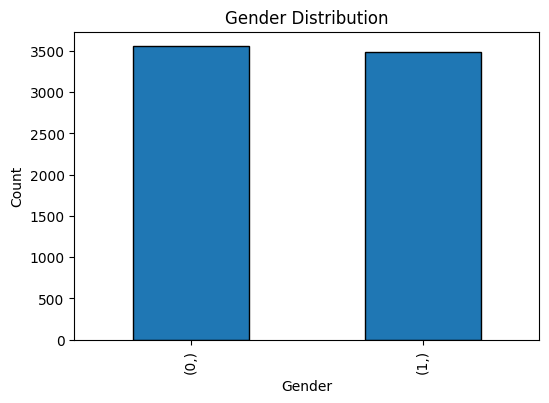

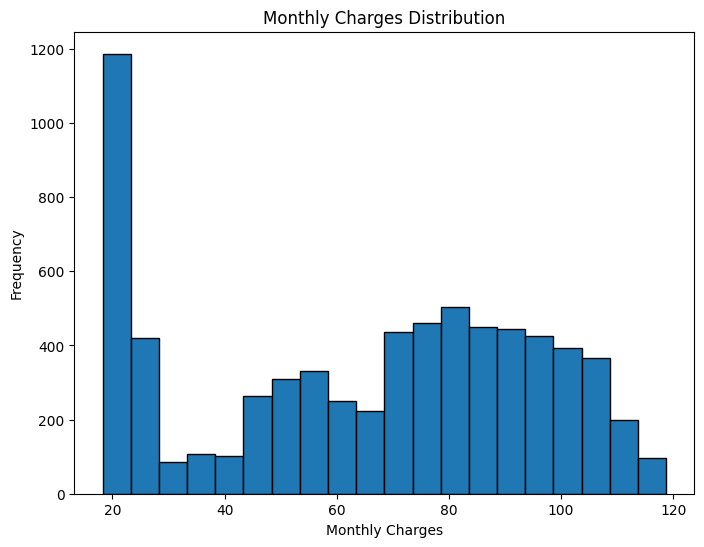

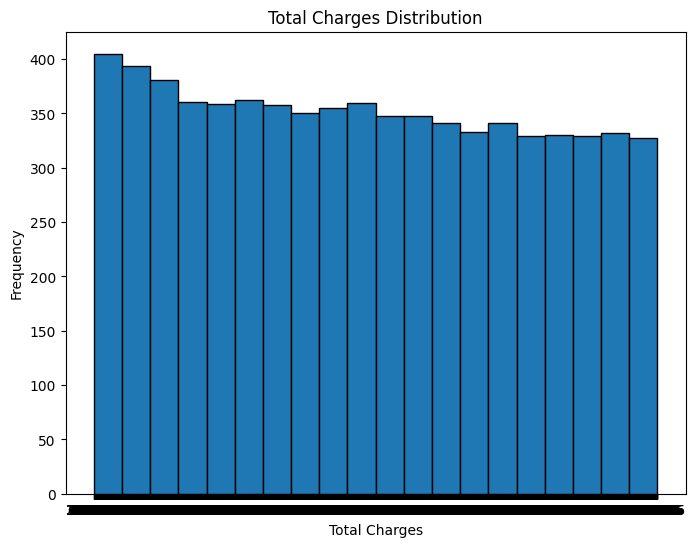

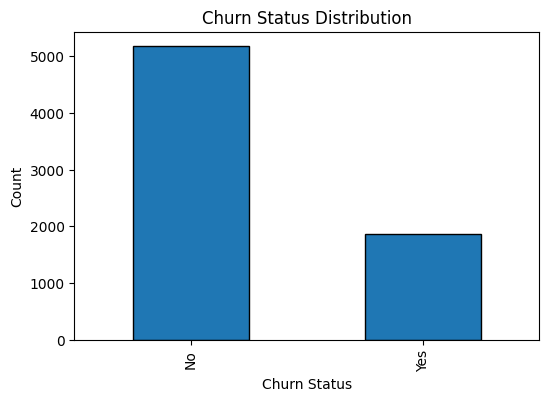

In [91]:
# Explore the distribution of key variables, such as customer demographics (gender), usage patterns (monthly charges, total charges), and churn status


# Gender distribution using Bar plot
plt.figure(figsize=(6, 4))
merged_df[['Female']].value_counts().plot(kind='bar', edgecolor='k')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

# Usage Patterns (Monthly Charges and Total Charges)

# Histogram for Monthly Charges
plt.figure(figsize=(8, 6))
plt.hist(clean_df['MonthlyCharges'], bins=20, edgecolor='k')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.title('Monthly Charges Distribution')
plt.show()

# Histogram for Total Charges
plt.figure(figsize=(8, 6))
plt.hist(clean_df['TotalCharges'], bins=20, edgecolor='k')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.title('Total Charges Distribution')
plt.show()

# Distributionof churn status using bar plot

plt.figure(figsize=(6, 4))
clean_df['Churn'].value_counts().plot(kind='bar', edgecolor='k')
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.title('Churn Status Distribution')
plt.show()


In [40]:
# Calculate and visualize correlations between variables using a heatmap.

# Calculate the correlation matrix
correlation_matrix = clean_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'Female'

In [43]:
# Conduct hypothesis tests (e.g., t-tests) to compare differences between churned and non-churned customers.


# churned customers
churned = clean_df[clean_df['Churn'] == 'Yes']['MonthlyCharges']
# Non-churned customers
non_churned = clean_df[clean_df['Churn'] == 'No']['MonthlyCharges']

# t-test to compare the means of churn and non churn groups
t_statistic, p_value = stats.ttest_ind(churned, non_churned, equal_var=False)

# Print the t-statistic and p-value
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to determine statistical significance
if p_value < alpha:
    print("There is a statistically significant difference between churned and non-churned customers.")
else:
    print("There is no statistically significant difference between churned and non-churned customers.")


T-statistic: 18.407526676414673
P-value: 8.59244933154705e-73
There is a statistically significant difference between churned and non-churned customers.


In [46]:
# Create summary tables and statistics for various customer segments (e.g., by contract type, payment method).

# Group the data by Contract type and calculate summary statistics
contract_summary = clean_df.groupby('Contract').agg({
    'MonthlyCharges': ['mean', 'median', 'std', 'count'],
    'TotalCharges': ['mean', 'median', 'std']
}).reset_index()

# Rename columns for clarity
contract_summary.columns = ['Contract', 'Mean_MonthlyCharges', 'Median_MonthlyCharges', 'Std_MonthlyCharges', 'Count_MonthlyCharges', 'Mean_TotalCharges', 'Median_TotalCharges', 'Std_TotalCharges']

# Print the summary table for contract segments
print("Summary Statistics by Contract Type:")
print(contract_summary)

# Group the data by Payment Method and calculate summary statistics
payment_summary = clean_df.groupby('PaymentMethod').agg({
    'MonthlyCharges': ['mean', 'median', 'std', 'count'],
    'TotalCharges': ['mean', 'median', 'std']
}).reset_index()

# Rename columns for clarity
payment_summary.columns = ['PaymentMethod', 'Mean_MonthlyCharges', 'Median_MonthlyCharges', 'Std_MonthlyCharges', 'Count_MonthlyCharges', 'Mean_TotalCharges', 'Median_TotalCharges', 'Std_TotalCharges']

# Print the summary table for payment method segments
print("\nSummary Statistics by Payment Method:")
print(payment_summary)


TypeError: Could not convert 29.85108.15151.65820.51949.4301.93046.05587.455036.32686.05528.351862.939.6520.152970.31530.64749.1530.21093.1181.6520.245.25316.93548.33549.251105.4981.453906.797144.153838.751426.41752.65633.31752.554707.15450.7857.25244.1887.3549.05177.4482.252111.379.35565.35496.94327.5918.751009.252570.274.77107927.35113.852514.520.219.45100.25238.93954.12868.15248.41064.652151.6112.75229.55350.3562.92135.519.751215.651502.6535.4581.251778.570.45563.6545.651071.4564.35655.5113.51152.81821.95764.551592.35135.22732651.2321.4242.8780.21145.7503.61559.2529.9545.3662.651111.6524.81023.8582.152379.15311901.656519.7520.751112.31033.952958.9579.91934.4584.525.251975.853437.45624.6268.35179.3555.22723.154747.584.6702114.11305.951120.36126.15731.3273.41074.348.55147.1540.2193.0580.551228.65132.21364.34925.352007.251511.224.82172.0570.6401.15624.851339.8771.95244.75322.9498.2525.43687.751779.95927.1570606.55435.41712.7567.8220.3520.253437.53015.7573.6396.1356.653141.72303.353741.8519.251886.25341.6415.552231.053236.3544.85138.1880.05139.05973.651470.05511.25155.83565.6566031830.14508.6572.1168.2996.85574.35371.9840.1846889805.183.751373.05492.55140619.15181.53646.825.352566.550.6590.85214.754874.74063442595.252309.5589.3367.553944.53694.72524.451803.77007.62861.4519.919.6233.72149.0544733545.051195.751845.975.3132.25515.45449.32838.55858.61395.051182.55119.5518.91183.83161.255.051882.555070.41166.72937.656396.4569.55759.551545.43582.42227.12494.653875.1100.91614.05385.9673.25734.3555564.41315.3574.71861.52747.2554.05453.4994.821451671.6680.05141574.35114.15139.420.41785.65131.051238.454326.81782.4851.8167.5502.8519.856300.15334.85916.952852.44131.95302.61929.35265.4514424713.41758.63480174.45851021.755029.05601.619.55834.15973266311.62596.1519.9760.0549.389.05516.15445.953527.63204.4597.93365.438.8233.5575.3346.21961.785.72438.645.6713.75237.21170.56786.4248.95663.05631.4186.34884.85522.95362.6137.62395.71968.14547.254687.92473.956985.65855.32499.389.55394.851899.6545.7161.51732.6222.374.6475.25164.3865.1697.6596.05428.720.05238.1145.151453.1191.0575.05493.42550.962.25313.63775.8580195.6571.149.991.14149.4520.45270.720.65168.152848.452516.233.6208.452015.352263.42211.819.551683.71164.054245.552664.31277.55589.3381.3141.53105.55204.55356.12758.153941.792.751901.052423.41653.453344.1137.11008.55202.15202.91652.95515.75190.51842.857.21269.5520.81907.85208.85363.151600.253089.1237.31444.6519.9454.1592.5184.6589.5220.451510.352.22003.6298.7143.65507.4201058.25489.451058.14113.169.5594.152088.05178.72317.16751.35318.11430.25644.35372.451442.63340.55292.85774.5544.42854.95394.189.962352.6550.81463.5307.42104.55319.15104.33027.4113.951582.751665.21043.3497.5520.05609.656215.3528235017.92619.2524.62679.71120.954914.927.55923.51625.65918.6234.85170.9688.651288.373.551643.552193255.351189.41820.92404.15205.05952.31212.85360.1308.05434.5320.45382.220015645.8215.877.62896.553395.885.15535.551253.15955.152162.644.7245.152028.82723.75220.45551.9545.7832.35112.360.65174.890.554733.11359.769.9888.6541386.62656.5540.9519.75537.352917.52416.1424.45132.4660.91893.95284.9417.71612.75119.753204.65160.85827.4549.5990.85162.45470.22066392.53861.452552.9819.42070.6273.753557.71957.1729.95649.43013.051266.11046.52347.94209.95152.319.65526.95552.7210.753706.95412.5832.05185.551943.21815.3612.952169.82210.24853.75144.5591.171321.15580.84527.45200.24564.9171.15940.351047.72766.41622.451129.3580.55580.1259.4324.15417.65168.15769.12058.5387.22839.653145.94997.51493.55593.054284.8544.55529.83865.69411133.6548.352070.05723.3598.35775.31074.6535.552324.7170.5196.91162.851677.8518.85370.45475.9224.052326.0531.351052.4283.953217.6519.851029.35669.451553.953953.151236.1531961500.560.15256.75593.45765.451259.35340.851348.95611.65467.8574.9194.2571.4580.251149.65740.8521.351532.45250.052282.554300.451111.2190.1143.3545.85810.24847.354017.451398.62564.3228.41529.2168.6536.351888.45629.3545.3289.32117.254730.9987.9545.0575.819.45523.1559.0592.75194.55612.16127.6303.786.054159.4562.8676.73242.5632.95270.951614.2402.5483.71345.551646.4512811553.93207.555124.55147.586.3557919.45187.7576.3569.251221.5525.1525.296.451114.5520.157133.25169.45563.051258.6857.22553.35250.81639.3178.85633.855315.1735.5889.91290330.05237.952452.7813.854904.852033.8579.22192.919.853970.4129.249.951554740.553217.552440.2520.35319.61938.0558.3442.85553546.45764039170.852948.61308.43418.2865.756373.15985.75732.51504.05741.43122.450.45739.9593.851132.757227.45193.61291.35349.65154.552031.9550.05332.45473.9106.8152.61199.42555.052979.2654.851534.7520.55424.152234.95281547.874.6571.153475.55156.852683.2896.752407.34456.6536.84346.41235.552082.95102.7551.2519.551775.8795.654993.461.454018.551146.656081.41478.851247.7574.72130.551313.551203.925.81579.796.172.455.251970.5335.47002.95158.95293.151093.4190.05882.55300.41025.95475819.55217.14896.35330.151474.92199.0545.85457.13107.3518.391.7832.31555.6545.374.95246.6261.65898.354509.5653.151183.05639.4520.05127.16710.5415.95950.2780.15273.25493.65385.55338484.2165.4120.2588.82755.35994.551169.35675.61611.652293.644.753029.1655.91191.2866.42627.24009.21463.4543.8770.6573.053419.33587.253541.35868.54859.11439.3585.879.1592.75134.54921.2901.255341.81139.27082.45324.64812.754399.5663.555125.5548.950.154594.952384.15319.85344.21655.351943.91616.15465.76669.0534.7264.82200.25425.199.755044.8196.4299.7417.753169.55438.05318.6163.7639.65273.21608.151441.952168.1559.8569.619.05418.819.5313.4569.9745.31212.1183.75264.8558321178.4654.5415.43161.680.956669.454689.51201.15143.6548.751505.15168.51652.471.6577.53264.51621.35947.33058.31761.051642.75973.2543.851490.4716.476.351676.952642.051835.375.519.24453.3323.452661.12697.41424.51739.659312333.85572.451381.82572.9547.9545.1452122.4520.054931.83273.8402.6325268.7546.245.1543.32250.651441.14338.645.952566.3247.2544.0545.554539.3567.170.05165.451156.551834.153653.351706.451194.3419.72145.1207.351083.72007.852657.551527.5378.41612.2266.85124.6571.05167.2174.21269.63862.551348.550.9471.551404.651961.64872.455118.95658.9581.0576.9520.2246.520.921.05189.149.8215.25099.15159.455940.85668.851916.275.3575.454613.952459.82048.8163.552888.7553.41210.41291.3576.651868.4825.793.552845.151021.555885.4268.41259309.12257.751350.151329.1545.769.9597.11710.45637.4117.952165.05223.15181.1341.45357.754616.14533.7750.11410.25830.8545.31340.1371.65134.6125.51390.620.22737.0574.370.62361.81730.351867.61043.324.7206.152030.35869.44946.054065106.554964.74085.751742.753415.25340.252896.64669.295.62934.3283.754600.7559471.357554.051702.9467.1520.1569.7529311400.85137.851423.05223.9391.779.9519.3811.65174.753126.851406.65834.7627.424230922168.965.952647.154.351790.6520.452429.1100.444.453023.5575.370.5520.155893.951430.05458.12745.7341.35147.75818.45348.8128.61737.4550.11797.752624.25184.1160.752684.353004.151233.65527.9111.443.95308.12555.9109.25179.251338.15926.291.379.5382.24264.6467.555427.05587.1100.8161.151180.957111.31648.453956.72625.551233.4294.27403883.3371.695.856690.75102.451588.7829.3712.2551.2217.552583.75146.05567.451384.7570.9220.953673.649.852331.374.54495.656941.2340.35908.551043.356822.1571.55157.555029.2581.7420.45633.4321.651253.925.1545.2743.7592.453410199.855068.0573.051020.26223.32933.21258.382.920673452.551802.153687.851391.15274.351214.051973.753211.9130.1585.52117.2424.75168.9253.82065.152447.4545.951838.1544.7511851743.970.1585.5525.750.62654.052416.553520.755969.95565.754370.7590.052169.4550.655.45436.61781.3588.3563.75617.15870.25601.25111.65777.3512.45141.453398.93640.45389.82401.05156.12796.3570.05511.25646.0535.93777.1547.560.65824.852094.65438.9847.3674.55162.55546.953186.651972.351527.35490.551531.4683.251133.9294.45461.7162.370.45659.4577.1535.252015149.5119.34849.1244.85220.755574.7589.754541.2255.510721440.751715.65869.9706.85512.252636.0593.451389.85189.274.252187.551581.269.52404.85171.453132.7519.4803.3679.37151230.251992.95562.733.7227.4537.2892.7487.753713.95141.74154.82655.255742.92866.4554.753759.05617.655935.194.62911.32974.5198.71275.653791.6780.25408.25231.82191.155611.7246.2552570.12878.753205.669.75279.256281.451131.3738.21137.0580.2260.819.63655.451299.8188.11077.054922.483.4140.7665.4584.81127.352142.8287.854045.652757.8560019.840.92094.91302.652238.555.5590.75365.651912.15670.6590.3519.751789.256713.22317.191.45266.9301.4206.6604.71471.752626.15412.1583.451049.05169.7551.63190.25812.54450.1151.8293.651308.12215.4216.4520.45996.45839.65765.5793.55402.8546.4462.8169.86780.194.555.32083829.755294.644.4477.786.05168.65174.3434.81077.595.65107.25851.220.95109.819.65329.85135.352000.2931.753958.85297.31515.1816.8688288.351178.25185.4758.6265.84107.3396.32072.75736.8336.151522.65622.94959.6329.951048.85442.63351.55184.151315262.052649.15220.6574.43326.2378.650.15560.851060.24920.5520.51936.8579.8202.25347.65999.9113.12015.8246.76017.950.15252.756841.0581.95451.144.6226.21017.352146.5455.31235.552362.11873.76010.051850.657101.51043.4716.16236.7545.05713309.2579.720.451254.769.25450.9432.251767.35297.351820.451742.9573.52970.82181.55371.4829.12602.94667824.7569.93465.05198.14108.151029.752854.55605.75661.554116.94494.654259.355.7493.952239.65480.75635.65038.15324.219.552793.552095648.6595.054242.35672.7268.45331.96283.32659.4196.9439.219.52107.1519.2298.453371.75442.4525.251156.356143.15144.8414.951059.55181.82180.5589.15459.951036.752276.95253162.654040.2196.151206.05107.0538.15184.11378.25137.621979.553444.8584.51813.149.91380.178.6545.42585.9582.758.85425.92030.753678.32483.5828.23810.551493.245.8777.3556.35187.35307.62136.9389.1187.45261.2538.45299.2323.251640762.153.525.1888.7542.92365.155073.14526.85308.2519.45678.451237.319.13474.2392.651058.62628.61023.91205.578.91025.15856.3512274.3702.93734.251144.545.375.61117.55180.2519.8930.05110.15333.6465.051669.43545.1504.05440.21151.551249.25317.75461.3431878.35335.751394.553413.253143.65664.42448.751329.24348.6563.693.725.053091.75365.55272.95381.22342.2653.95278.1555.25109.292.0593.853168.75343950.4542.4596.85111.0594.4521.1923.85141.1628.651046.11287.85118.25875.3579920.1710.05568.21900.25159.15856.65551.34056.753684.951752.452157.324.4433.952435.152874.154433.3964.351974.8399.251218.5581.72171.153634.8317.253369.053474.053645.05135.751319.85229.4370.2569.11233.2583.369.6305.553653241.378.452104.5520.319.2255.25146.91011.05762.5535.3575.55338.970.25908.754913.346.34443.45316.2564.651095.65446.052106.05811.8186.051056.9544.15834.1585.45999.8239.5559.21461.45416.41060.64869.3554.92254.2580.82495.2180.35913.95158.4104.219.444.495.1438325.451148.1155.93673.1570.673.455586.451537.9355.282.855327.25151.3188.75549.42621.75837.5401.56118.951800.0550.6863.169.81948.354750.952391.8157.751687.952807.1229.5544.951025.1590.5519.52274.3548343131.8602.553369.252674.15199.75449.7519.71400.3411.65841.354512.75688.451345.75196.95214.55865.851358.63147.15131.05542.4415.0598.587.9754.6575.351952.25153.83198.620.9190.251651.9578.344.9576.7267.35934.15123.6519.453645.6314.45906.854888.7237.2574.6342.4140.11108892.6579.15438.42070.753019.54729.753183.479.6472.651734.51884.65278.42088.8502.62595.8550.751208.351956.42096.12665543.820.353005.825863292.3651.4232.35658.1223.45919.4653.951825.5181.6545.65551.35359.4115.95165.22338.3546.33541.14146.051087.252522.481717.31734.23017.651164.31558.72710.25810.72538.21750.8536.552575.456019.351284.2653.2585.549.551928.771.25216.2178.5115.12745.23121.1157.65572.8525.252433.5641.15583416.45788.6202.34116.154915.15838.575.14273.4545.820.530.551398.2520.1328.954680.0569.13161.4999.453990.671.151240.252353089.6270.82901.84949.1374.51520.92281.650.753605.2874.21145.351323.75497.052455.0538.735770.81448.6291.95921.35146.65134.05249.951701.65135.754282.4219.6566968.95224.85196.756572.8529.1520.05318.924.4549.55631.85232.5749.25307.4134.7555.84266.41077.579.059525.24187.75137.25966.556936.853496.3914.319295817.7178.84352351.8186.15445.85912679.554222.951994.31505.8520797.2571.651359.452542.4554.744.5587.3210.38061.574.2518.75238.54388.4420.2827.052599.95284.33436.12462.5570.85280.85411.75198.6103.719.653249.45405.83363.87132.1593.55566.11742.52983.8241565.7298.35970.45405.72415.9545.75176.21001.21594.75212.4815.580.15340.35419.355647.9529.94348.1635.9108.9578.81682.45127.95874.8143.969.11776.55536.41559.45607980.85383.5551.151745.51837.7149.55180.7576.9568.45123.0578.65468.35174.742.944139.35539.85300.4992.74718.25434.11563.91332.4545.21284.2161.45226.95646.8569.952298.551727.586.6237.652979.5695.7524.25825.1837.95330.81337.45362.22068.552301.15131.65403624.0520.450.55117.055839.345.351415.5520.5163.2189.95321.9482.8286.85683.6369.154631.7401.95701.3262.39142139.15780.71172.95662.951765.95155.353303.05134.35709.570.5953.4550.1519.754052.4664.4718.55937.65812.62546.851346.3765.1569.66851.6578.05247520706.649.91370.3520.252215.2574214.41871.156171.220.2161.45336.7333.65393.452264.0556.355623.72971.72510.22427.351760.253551.65122.92111.452909.9537420.25300.85581.055676.65232.485.452088.451434.62043.452215842.252576.2601.6605.453094.05469.819.754925496.9107.1522.351457.25185.619.51066.9973.55985.05828.0541.856164.72862.7533.6343.9520.72890.651222.056871.7208.253062.451816.75408.51011.52549.12496.790.6288.05368.11013.35152.9519.3220.4158.35256.668.5791.7569.9519.95346.4773.651422.0519.752460.355116.61033.91885.152467.1502559.7594.554863.856871.91454.152404.1525.75114.7109.5546.851782.4280.352897.95801.3257.0540.12217.151129.12568.55492.11718.954469.13580.31729.351073.3293.31783.752440.1579.551058.1123.8273120.7589.1497.3711.151607.21490.952929.75838.71443.656951.15214.75235.292.65606.252727.819.180.31462.6150.65960.574.9314.5556330.82249.12807.654902.81857.75751.6566.9520.151706.454515.85179.8516520.252936.251271.8530.0519.21808.71144.67446.925.16595149.054972.11880.852045.552187.15477.552976.95178.71461.152782.41496.9452.21322.5570.45139.753000.252245.424.75944.652012.71864.651221.65302.351374.91336.91297.8242.0544.7563.75260.97320.92967.35939.74200.251037.7593.450.451573.953624.3100.251468.752607.61422.169.85858.6324.3399.6322.53273.552510.761.0520.9140.469.41626.05541.1570.355500.63229.419.75235.0570.1909.255283.951617.5574.5400.384.32656.32244.9511301131.2585.9519.952062.15720.452186.42979.3956.653973.2447.9661.251111.85493046.1569.35836.35272.220.9550.55257080.5544.15916.96487.21855.651556.855432.2147.552203.7116.652287.25130.5446.8830.7203540.651054.6130.551540.356411.25101.9313.4629.552640.5585.052196.453008.15222.65246.32110.15547.65969.854747.85101.16496.1559.554370.25144.351125.239.85422.4251.75314.64331.46382740.3600.155538.8690.5279.31427.55452.719.4553.15166.32404.17024.4209.9610.753409.670.7155.35144911.61270.21561.51615.11097.15369.331.55432.5321.75147.15532.1375.25125.951620.252387.75659.352660.2377.55990.9193.8964.9790.152467.752322.851914.96470.157.42019.85688.051522.72526747.35105.62271.851772.2561.15494.9544.455219.653067.220.2574.3562.052877.95959.9541.9929.3971.31285.053414.65162.45216.9245.2302.752964.052156.2560.178.952275.15511.6598.5244.652431.35351.5106.21743.05657.5426.3519.551451.9235.0571.12633.449.6546.352659.45196.75941517.53479.0520.31424.95193.6620.554391.251993.819.953.951799.3829.551312.151597.05524.356812.951837.969.8545.151500.252283.15494.05488.652841.55486.85204.72995.45505.95137.95349.81067.053527.337621248.9144.953233.65438.91081.451882.82065.4221.93848781.254779.45250.11745.274.93670.51167.8469.6558.9333.553171.1574.71381.2455.53645.53152.53186.7849.9151.75299.43767.43641.52535.5535.75181.644.551539.8223.754385.051539.4518.91261.3558.15225.6253.9340.852515.3227.35305.95365.42357.75198.590.8569.4742.95251.655597.6520.154816.7768.051215.81834.95305.1910.45155.6552389.251261108.744.1712.751637.42536.55958.25201.95285.21529.451740.7552.9593.7312.71046.5834.26953.4899.8541.54156.8223.6768.453765.052157.5108.051273.370.3377.85851.75355.1575.45906.851057.5519.41641.31375.15152.7195.051826.716602180.552835.945.152730.8520.25794.45747.21267.95724.651536.753615.6607.32184.351852.8577.151923.5338.175.352184.853875.41451.12847.21494.541.85475.1673.1208.7150.753403.4237.75221.3575.31672.13043.72723.41081.25632.24042.3164.854113.770.43729.75399.451336.151147.451078.95925.754747.21028.9226.454364.12433.91217.2519.75154.36382.5589.2586.0582.85893.2810.8543.1535.13851.451743.5684.8574.351312.45159.2610.2404.3569.65713.119.65505.95169.65526.711473021.6191.352718.336.454133.952917.6554.32964.82001.53825.85225.65955.753382.3933.3780.85764.951614.7145.4156.25270.1520.6573.15306.05639.7348.151587.5540.25842.9784.451406.91761.454192.15164.52724.61173.55318.57713.552227.83744.052351.452989.62479.05638.952139.2831.75521.3608577.65953292.85953.65198609.920.5579.655431.96401.252812.280.052698.35616.91912.85849.11465.7590.12907.35146.351.254952.9545.6267.352078.55288.05853934.11222.819.11003.052509.9574.452345.22335.325371393.689.354445.3331.35291.4453.751597.25235.5673.21442.25222.35799.6550.8249.4144.552447.953050.152534517.25436.2118.419.93649.61200.1570.65083.55389.6523.539.32406.14524.052277.6524.81505.45913.31411.651008.73096.92613.4853.1794.25160.83275.1554.51174.35741.73019.25962.91233.154882.819.65148.0584.6569.55129.55347.25581.7354.05929.4544.35586.052576.81993.251923.85939.884.63092.65415.55651.545.473.654458.1550.75321.05335.651424.4474.9668.4926.25461156.1382.81167.820.2221.71794.65501.248.45201.12838.755.73735.4570.15477.5542.72025.11747.2296.181.120.551043.86252.91857.25146.4240.45315.3356.1555.7973.45384.25389.955731.8520.654275.7584.5669.854060.55267.43532.8569.85775.653.552169.75896.919.349.65477.6370.651849.9561.051910.6890.6529.548.61207563.52109.352265.25220.65749.820.22076.0544.2215.25229.52470.12092.95629.55469.85733.95485.251244.520.053994.4578.25184.0519.91178.75667.719.95109.379.675.976.219.253168669.453588.448.6522.9549.751691.92248.056370.253314.15865.55852.791.43949.15409.9207.419.7560649.6520.85352011.4503.6383.65452.81152.72157.951219.852414.551155.67548.11564.419.6575.784.4864.851951470.6384.53432.9108.65463.052867.754807.3571.351132.351815199.451637.320.051611.1520.61931.75818.051992.55916.7533.7454.051392.25734.670.151540.053181.8229.7266.61982.6339.920.32383.669.6589.31438.053078.199.952036.556444.051426.75767.554040.651672.35474.8446.11345.652425.42077.95416.31286.0535.85514.61451.671330.25746.5122.744.42419470.270.379.353097809.751470.95577.156914.9596.83827.9533.05995.35154.8246.3257.61389.21474.75720.12832.75472.251460.65153.051165.62119.57268.35441351400.5569.651380.41060.28679.45275.4846.84783.52997.45524.547402341.55060.851448.84254.85466.6851101.8544.320.2414.1256.63969.351296.859.252006.1487.05483.35618.31237.85498.1294.452381.55788.35613.43625.2550.351267.2442.284.85654.855567.453085.3524.73541.484.250.71165.552806.91422.65608.1535.91321.33024.154138.05102.52724.25413.25757.1218.5608.81004.753847.61098.851139.2827.7279.553512.51483.25151.754400.75552.6524.9460.25678.755485.5683.75404.2233.65291.45254.5347.65242.951841.9232.1866.45360.552076.2355.97299.652291.27031.45103270.75109.6130.75893781.4902.252653.655943.65275.73457.9340.41093.2521.9713.61265.654003.8545.3178.1480.6251.2523.45137329.749.86039.93440.25151.355.490.6156.3567.5570.22952.85294.9113.3519.95476.8101.651130.853532.251570.7520.95357.613591777.91122.42020.94504.553579.1549.7276.5259.85588.850.6585568.352203.652024.12369.052871.5672.551573.7126.052193.6564.5531.2533.61620.8293.853243.454137.279.2544.919.45348.65659.653180.5118.53365.85195.3997.652237.55358.580.52421.751294.6305.55900.53856.75374.8331.853959.355088.43969.4470.95560.625.75976.9506.980.3520.0576.451457.5880.23270.2569.953919.1593.3169.055295.7217.4519.252021.352564.9535.057345.7574.22716.370.11175.85142.3533.2926.25287.42341.55163.62254.2145.1519.73769.73725.5413.65714.152497.2601.55139.25197.7401.379.15235.81364.75655.85303.15647.51574.452044.95921.44018.3520.2549.92085.451358.855135.152869.85118.2549.251108.61815.6575.455071.054014.6568.854238.4520.3418.3136.05708.2700.85181.74016.854122.974.344.651095.3788.86578.5519.55364.551861.120.43069.452349.83301.054144.9154.651905.4141.652954.53807.355785.65418.4275.92130.4550.574.43756.453334.9920.5150.35367.9519.551242.24871.053190.652666.75295.651459.354398.154297.95167.33454.61387786.394.41375.655718.1320.4101.451334.454764350.369.518.8569.2786.569.654086.35364.882.320.32419.55267.61115.25435.64186.325.05688.5867.1712.8548.95355.145.3167.31505.35930.4324.25156.41679.65299824.4152.451959.51130.854323.45703.551275.7164756.252249.95159.468.653320.6327.455669.5704.31369.81107.2595.556375.21566.75110.05816.81253.541.26548.6570.85134.72978.3299.3450.81215.691.73915.4979.590.054026.425.320.1398.5569.963.15484.0545282208.75238.1580.8118.376.451094.5573.751218.251405.32274.974.51068.85762.251902239.0539.8406.05138.85123.651801.1790.7582.52122.0569.1554.651224.052310.2723.43988.53554.685.11733893.6357.15289.12221.55172.853090.651293.8500.11601.585.51232.919.91096.254889.22289.96503.21313.25990.32285746.15209.1805.2154.85528.452259.351411.35593.7520.35238.53233.851062.1226.555440.9235.1853313.41938.9460.25184.419.92010.5569.23171.6299.75702.053473.419.6592.251242.45559.2220.1531.15465.855013782.4460.220.2733.354600.95113.551793.25886.71879.25434.5308.7438.2550.353778.15438.9570.35617.755386.51776.952483.05235.655224.352272.883.754663.4620.351806.35519.15497.61301.71129.7519.3266.95865.82623.6545.8579.551082.8147.82570.22924.056014.8532.75305.052368.43545.351301372.4577.7595.451135.73720.355025.81498.5569.7573.31818.91051.053688.699.75871.4780.5239.45244.45129.6365.35334.6543.954981.1545.127511307.82868.05449.7553.55791.74414.34869.54308.25221.169.354092.85316.9471.7216.75503.2569.6385961.430.553.052108.35232.555121.31127.2309.4523.1770.53930.61747.852754.45897.755895.452196.151692.620.5265.351836.251218.2524.2679.85554.452032.3789.22804.451652.13366.05778.14367.352093.41011.8106.85130.11022.53691.24036.85256.251917.174.45272.153756.43645.752874.4549.9570.652396479.43626.351679.4403.35931.55263.0539.2575.752625.256886.251495.1346.45306.6 to numeric